<a href="https://colab.research.google.com/github/ayrna/deep-learning-with-python-notebooks/blob/master/chapter04_getting-started-with-neural-networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este cuaderno está basado en los cuadernos del libro [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff).

> This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.
> **If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**
> This notebook was generated for TensorFlow 2.6.

# Clasificación y regresión con redes neuronales

## Ejemplo de clasificación binaria: reseñas de películas

### El conjunto de datos IMDB

Conjunto de datos IMDB: un conjunto de 50.000 reseñas **muy polarizadas** de la Internet Movie Database. Se dividen en 25.000 críticas para entrenamiento y 25.000 críticas para test, cada conjunto consta de un 50% de críticas negativas y un 50% de críticas positivas.

Al igual que el conjunto de datos MNIST, el conjunto de datos IMDB está disponible en Keras. Ya ha sido preprocesado: las reseñas (secuencias de palabras) se han convertido en secuencias de números enteros, donde cada número entero representa una palabra específica de un diccionario (reducido). Esto nos permite centrarnos en la construcción, entrenamiento y la evaluación del modelo. 

**Cargar el conjunto de datos IMDB**
`num_words=10000` filtra a las palabras más frecuentes en los datos de entrenamiento de las 88.585 disponibles. 



In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


Las variables `train_data` y `test_data` son una secuencia de índices de las palabras de cada reseña. 

Las etiquetas 0 y 1 significan que la reseña es *negativa* o *positiva* respectivamente. 

In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0]

1

Como nos limitamos a las 10.000 palabras más frecuentes, ningún índice de palabras superará las 10.000:

In [4]:
max([max(sequence) for sequence in train_data])

9999

**Decodificar el texto de una reseña**

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])
print(decoded_review)

1641221/1641221 [==============================] - 0s 0us/step
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amaz

Ejemplo de una reseña negativa

In [6]:
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[1]])
print(decoded_review)

decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[2]])
print(decoded_review)

? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ? the hair is big lots of boobs ? men wear those cut ? shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then
? this has to be one of the worst films of the 1990s when 

### Preparación de los datos

Las redes neuronales necesitan trabajar con datos del mismo tamaño. Por tanto , no se pueden introducir directamente listas variables de enteros en la red neuronal y tenemos que convertir las listas en tensores. Hay dos maneras de hacerlo:
 
 * Rellenar las listas para que todas tengan la misma longitud como un tensor entero de la forma (muestras, longitud_máxima), y utilizar la capa [`Embedding`](https://keras.io/api/layers/core_layers/embedding/)). Ver [Understanding Embedding Layer in Keras](https://medium.com/analytics-vidhya/understanding-embedding-layer-in-keras-bbe3ff1327ce) para ampliar.

* *Multi-hot encode*: Codificar las listas para convertirlas en vectores de 0s y 1s. Por ejemplo, convertir la secuencia [8, 5] en un vector de 10.000 dimensiones que sería todo 0s excepto los índices 8 y 5, que serían 1s. Así ya se podría usar una capa `Dense`, capaz de manejar datos vectoriales de punto flotante, como la primera capa del modelo.

**Codificando las secuencias de entero como *multi-hot encoding***

Vectorización de los datos de entrada:

In [7]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

Vectorización de las etiquetas y transformación a `float32`:

In [9]:
type(train_labels)
type(train_labels[0])


numpy.int64

In [10]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Construcción del modelo

Despues del preprocesamiento, los datos de entrada son vectores, y las etiquetas son escalares (1s y 0s): esta es una de las configuraciones de problemas más simples que se pueden encontrar. Un tipo de modelo que funciona bien en este tipo de problemas es una pila simple de capas totalmente conectadas (`Dense`) con activaciones `relu`.

Hay dos decisiones clave de arquitectura que se deben tomar sobre tal pila de capas densas:

* Cuántas capas utilizar
* Cuántas unidades elegir para cada capa

En el capítulo 5 del libro ([Fundamentals of Machine Learning](https://livebook.manning.com/book/deep-learning-with-python-second-edition/chapter-5)) se indican más principios y heurísticas para orientar la definición de la arquitectura. 

Por el momento utilizaremos la siguiente arquitectura: 
* Dos capas intermedias con 16 unidades cada una
* Una tercera capa que emitirá la predicción escalar sobre la opinión de la reseña actual

Nota de traducción: **sentiment != sentimiento**



**Definición del modelo**

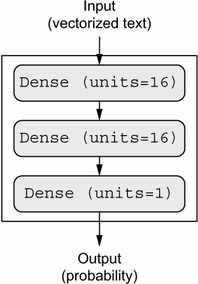



In [11]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

El primer argumento que se pasa a cada capa Dense es el número de unidades de la capa: la dimensionalidad del espacio de representación de la capa. 

Recordemos la implementación de cada capa: 

```
output = relu(dot(input, W) + b)
```
Tener 16 unidades significa que la matriz de pesos `W` tendrá forma `(input_dimension, 16)`: el producto escalar con `W` proyectará los datos de entrada en un espacio de representación de 16 dimensiones (y luego añadirá el vector de sesgo `b` y aplicará la operación `relu`). 

❓❓❓

¿Qué implicaciones tiene el aumento o reducción de la dimensionalidad de la capa

❓❓❓

Función relu: 

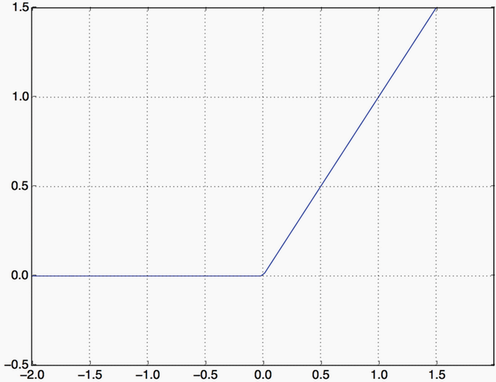

Función sigmoide: 

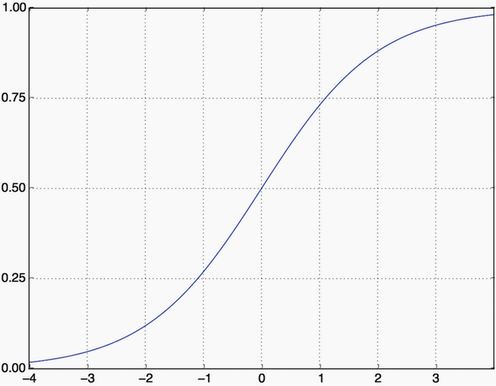

# Respuesta ✅

Aumentar o disminuir la dimensionalidad de una capa en una red neuronal tiene varias implicaciones:

- Número de parámetros: El número de parámetros en la red es directamente proporcional a la dimensionalidad de la capa. Esto significa que aumentar la dimensionalidad de una capa aumentará la cantidad de parámetros en la red, lo que puede provocar un sobreajuste si el conjunto de datos no es lo suficientemente grande.

- Poder de representación: aumentar la dimensionalidad de una capa aumentará el poder de representación de la capa, lo que permitirá que la red capture patrones más complejos y detallados en los datos. Sin embargo, si la dimensionalidad es demasiado alta, la red puede volverse demasiado especializada para los datos de entrenamiento y puede no generalizarse bien a nuevos datos.

- Costo computacional: aumentar la dimensionalidad de una capa aumentará el costo computacional de la red, ya que se requieren más cálculos para procesar los datos a través de la capa. Esto puede llevar a tiempos de entrenamiento más prolongados y puede requerir un hardware más potente.

- Interpretabilidad: aumentar la dimensionalidad de una capa puede dificultar la interpretación de las características que detecta la capa. Esto se debe a que las características se representan en un espacio de mayor dimensión, lo que puede ser difícil de visualizar o comprender.

En general, la elección de la dimensionalidad de una capa es una compensación entre el poder de representación, el costo computacional y la capacidad de generalización, y debe considerarse cuidadosamente en función de la tarea y el conjunto de datos específicos.

❓❓❓

¿Por qué son necesarias las funciones de activación?

❓❓❓

# Respuesta ✅

Las funciones de activación son necesarias en las redes neuronales porque introducen la no linealidad en el modelo, lo que le permite aprender relaciones complejas y no lineales entre la entrada y la salida. Sin funciones de activación, una red neuronal sería un modelo de regresión lineal, que solo puede aprender relaciones lineales entre la entrada y la salida.

Las funciones de activación se aplican a la salida de cada neurona en una red neuronal, transformando la entrada en una nueva salida que pasa a la siguiente capa de la red. Esto permite que la red aprenda representaciones más complejas de los datos de entrada.

Las funciones de activación también ayudan a normalizar la salida de cada neurona, evitando que crezca demasiado o demasiado pequeña, lo que puede hacer que la red se vuelva inestable durante el entrenamiento. Además, algunas funciones de activación, como las funciones sigmoide y tanh, pueden introducir una forma de regularización que ayuda a evitar el sobreajuste al restringir los valores de la salida.

En general, las funciones de activación son un componente fundamental de las redes neuronales, lo que les permite aprender relaciones complejas y no lineales entre la entrada y la salida, manteniendo la estabilidad y evitando el sobreajuste.

**Compilación del modelo**

Como función de pérdida alternativamente podríamos usar `mean_squared_error` aunque en principio la entropía cruzada es más adecuada para trabajar con datos probabilísticos ya que mide la distancia entre distribuciones de probabilidad (*Crossentropy*). 

Resumen de la entropía cruzada: 

* El error cuadrático medio ($MSE$) no es la función natural de error cuando tenemos salidas probabilísticas, ya que trata por igual cualquier diferencia de error.
* Para problemas de clasificación, deberíamos penalizar más los errores cometidos para la clase correcta ($d_j=1$) que para la incorrecta ($d_j=0$).
* La entropía cruzada ($-\ln $ verosimilitud) es más adecuada para problemas de clasificación ya que compara las dos distribuciones de probabilidad:
\begin{equation}
L = - \frac{1}{N\cdot J} \sum_{p=1}^N\left(\sum_{o=1}^J d_{po} \ln(o_{po}) \right)
\end{equation}


❓❓❓

**EJERCICIO:** ¿Cuáles serían las dos distribuciones de probabilidad

❓❓❓

# Respuesta ✅

En el contexto de la función de pérdida de entropía cruzada para problemas de clasificación, las dos distribuciones de probabilidad que se comparan son:

1. La distribución de probabilidad predicha: esta es la distribución de probabilidad que genera el modelo para cada clase posible. Representa la confianza del modelo al asignar una cierta probabilidad a cada clase.

2. La verdadera distribución de probabilidad: esta es la distribución de probabilidad que representa las etiquetas verdaderas de los datos. Tiene un valor de 1 para la clase verdadera y 0 para todas las demás clases.

La función de pérdida de entropía cruzada mide la diferencia entre estas dos distribuciones de probabilidad, con el objetivo de minimizar esta diferencia durante el entrenamiento. La función de pérdida de entropía cruzada es una función de pérdida de uso común para problemas de clasificación, ya que penaliza más los errores cometidos en la clase verdadera y alienta al modelo a generar probabilidades más altas para la clase verdadera.

In [12]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validación del modelo

**Reservar un conjunto de validación**

Nota: en este conjunto de datos se puede hacer porque los suponemos aleatorizados. Recuerda conceptos como estratificación al dividir el conjunto de datos en entrenamiento, validación y test❗❗❗. 

In [13]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Entrenar/ajustar el modelo**

Parámetros: 
* Datos de entrenamiento y, opcionalmente, de validación
* Épocas
* Tamaño lotes

El siguiente código debería tardar unos 2 segundos por época:

In [14]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 68ms/step - loss: 0.5247 - accuracy: 0.7671 - val_loss: 0.3940 - val_accuracy: 0.8664
Epoch 2/20
30/30 [==============================] - 2s 61ms/step - loss: 0.3257 - accuracy: 0.8939 - val_loss: 0.3130 - val_accuracy: 0.8851
Epoch 3/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2411 - accuracy: 0.9209 - val_loss: 0.2941 - val_accuracy: 0.8824
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2014 - accuracy: 0.9327 - val_loss: 0.2747 - val_accuracy: 0.8899
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1646 - accuracy: 0.9479 - val_loss: 0.3061 - val_accuracy: 0.8784
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1434 - accuracy: 0.9548 - val_loss: 0.2806 - val_accuracy: 0.8874
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1236 - accuracy: 0.9618 - val_loss: 0.2947 - val_accuracy: 0.8860
Epoch 8/20
30

Visualización del modelo: 

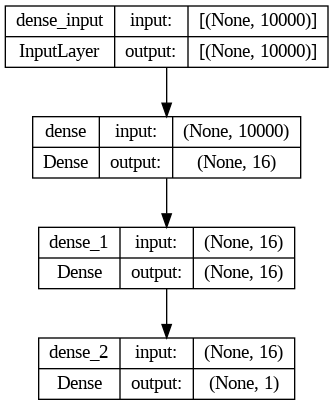

In [15]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

❓❓❓

**EJERCICIO:** ¿Por qué no hemos podido visualizar el modelo hasta ahora

❓❓❓

# Respuesta ✅

Sin embargo, simplemente llamar a `plot_model` no crea la arquitectura del modelo ni compila el modelo para el entrenamiento. La función `model.compile` se usa para establecer el optimizador, la función de pérdida y las métricas de evaluación para el modelo, y la función model.fit se usa para entrenar el modelo en los datos de entrenamiento. Solo después de que se hayan completado estos pasos, podemos usar `plot_model` para visualizar la arquitectura del modelo.

En resumen, `plot_model` es una herramienta de visualización que se puede utilizar para visualizar la arquitectura de un modelo de Keras, pero en realidad no crea ni entrena el modelo.

Diccionario de historial del ajuste. En nuestro caso tiene 4 entradas, una por cada métrica que se ha monitorizado durante el entrenamiento y la validación.

In [16]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Dibujar la **función de pérdida** en entrenamiento y validación:

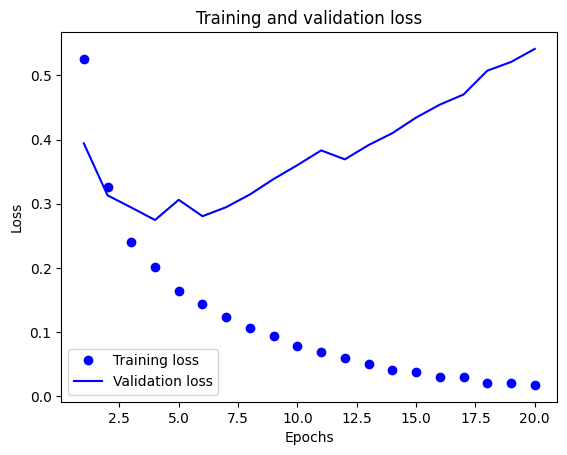

In [17]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Dibujar la precisión de entenamiento y validación:

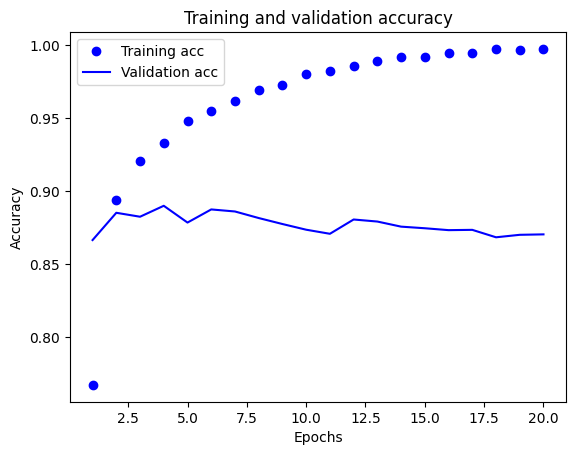

In [18]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

❓❓❓

**EJERCICIO**: ¿Qué observas en las gráficas anteriores?
¿Cómo podríamos tratar de arreglar el problema que observas? (incluye código y gráficas que lo solucione y visualice)

❓❓❓

# Respuesta ✅ 

Al observar el gráfico de pérdida de entrenamiento y validación, podemos ver que la pérdida de entrenamiento disminuye con cada época, lo cual es una buena señal. Sin embargo, la pérdida de validación parece aumentar después de alrededor de 4 o 5 épocas, lo que sugiere que el modelo puede estar sobreajustado a los datos de entrenamiento y no generalizar bien a los datos nuevos.

Para abordar este problema de sobreajuste, podemos intentar usar alguna forma de regularización, como la deserción o la regularización del peso. También podemos intentar reducir el tamaño del modelo o aumentar la cantidad de datos de entrenamiento, si es posible.

Tenemos que añadir algunas bibliotecas nuevas:

In [19]:
from keras import regularizers
from keras.callbacks import EarlyStopping

In [20]:
model = keras.Sequential()
model.add(layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.001), input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# add early stopping
early_stop = EarlyStopping(monitor="val_loss", patience=3)

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    callbacks=[early_stop])

Epoch 1/20
30/30 [==============================] - 2s 34ms/step - loss: 0.6917 - accuracy: 0.6092 - val_loss: 0.5784 - val_accuracy: 0.8128
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.5831 - accuracy: 0.7323 - val_loss: 0.4787 - val_accuracy: 0.8569
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.5008 - accuracy: 0.7968 - val_loss: 0.4145 - val_accuracy: 0.8652
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.4496 - accuracy: 0.8336 - val_loss: 0.3675 - val_accuracy: 0.8819
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.4090 - accuracy: 0.8657 - val_loss: 0.3400 - val_accuracy: 0.8860
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3678 - accuracy: 0.8867 - val_loss: 0.3569 - val_accuracy: 0.8739
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3414 - accuracy: 0.9017 - val_loss: 0.3334 - val_accuracy: 0.8813
Epoch 8/20
30

In [21]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

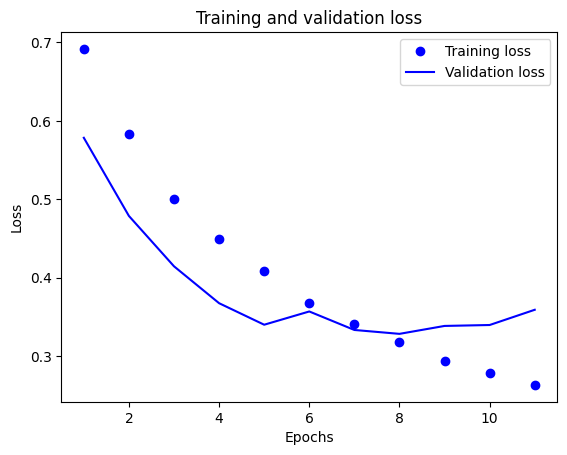

In [22]:
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Reentrenar el modelo**

Después de nuestro análisis, podemos volver a reentrenar el modelo con otros parámetros. ¿Qué cambiarías?



```
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(...)
model.fit(...)
results = model.evaluate(x_test, y_test)
```

Haz tus pruebas aquí: 

### Hacer predicciones en datos nuevos

In [23]:
model.predict(x_test)

782/782 [==============================] - 1s 1ms/step


array([[0.140444  ],
       [0.99997264],
       [0.9984158 ],
       ...,
       [0.07658793],
       [0.06818141],
       [0.77516425]], dtype=float32)

❓❓❓

**EJERCICIO**: Calcula la precisión global y la matriz de confusión en los datos de test (tienes ejemplos en cuadernos anteriores).

❓❓❓

# Respuesta ✅

In [24]:
# predecir etiquetas para datos de prueba
y_pred = model.predict(x_test)

# convertir probabilidades predichas a etiquetas binarias
y_pred_binary = (y_pred > 0.5).astype(int)

782/782 [==============================] - 1s 2ms/step


In [25]:
# calcular matriz de confusión
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(y_test, y_pred_binary)

# imprimir matriz de confusión
print("Confusion matrix:")
print(confusion_mat)

Confusion matrix:
[[10673  1827]
 [ 1159 11341]]


In [26]:
# calcular la precisión global
global_precision = (confusion_mat[0,0] + confusion_mat[1,1]) / np.sum(confusion_mat)
print("Global precision: {:.2f}".format(global_precision))

Global precision: 0.88


### Amplía experimentos:

Los siguientes experimentos te ayudarán a convencerte de que las elecciones de arquitectura que has hecho son bastante razonables, aunque todavía se puede mejorar:

* Hemos utilizado dos capas de representación antes de la capa de clasificación final. Prueba a utilizar una o tres capas ocultas y observa cómo afecta esto a la validación y a la  recisión de la prueba.
* Prueba a utilizar capas con más o menos unidades: 32 unidades, 64 unidades, etc.
* Prueba a utilizar la función de pérdida `mse` en lugar de `binary_crossentropy`.
* Prueba a utilizar la función de activación `tanh` en lugar de `relu`.


❓❓❓

**EJERCICIO**: Como hicimos anterioremente, trata de recoger todo el código del notebook en una sola celda que te permita experimental fácilmente con diferentes arquitecturas y parámetros. Puedes asumir que los datos están ya cargados y procesados y centrarte en los experimentos. Necesitarás: 
1. Definir el modelo
1. Compilar el modelo
1. Ajustar el modelo
1. Dibujar gráfica de convergencia
1. Calcular la precisión en test

❓❓❓


# Respuesta ✅

Epoch 1/20
30/30 [==============================] - 2s 34ms/step - loss: 0.6705 - accuracy: 0.6417 - val_loss: 0.5231 - val_accuracy: 0.8531
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.5303 - accuracy: 0.7778 - val_loss: 0.4108 - val_accuracy: 0.8734
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.4507 - accuracy: 0.8320 - val_loss: 0.3619 - val_accuracy: 0.8847
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3983 - accuracy: 0.8665 - val_loss: 0.3429 - val_accuracy: 0.8881
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3524 - accuracy: 0.8845 - val_loss: 0.3241 - val_accuracy: 0.8882
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3197 - accuracy: 0.8999 - val_loss: 0.3355 - val_accuracy: 0.8840
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2974 - accuracy: 0.9113 - val_loss: 0.3523 - val_accuracy: 0.8796
Epoch 8/20
30

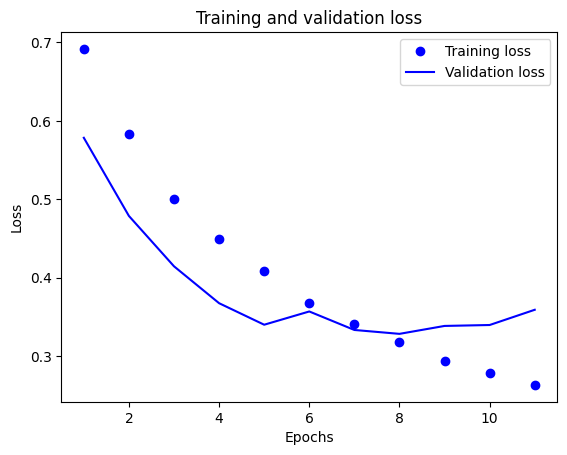

782/782 [==============================] - 1s 1ms/step
Global precision: 0.88


In [27]:
model = keras.Sequential()
model.add(layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.001), input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# add early stopping
early_stop = EarlyStopping(monitor="val_loss", patience=3)

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    callbacks=[early_stop])

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# predecir etiquetas para datos de prueba
y_pred = model.predict(x_test)

# convertir probabilidades predichas a etiquetas binarias
y_pred_binary = (y_pred > 0.5).astype(int)

confusion_mat = confusion_matrix(y_test, y_pred_binary)

# calcular precisión global
global_precision = (confusion_mat[0,0] + confusion_mat[1,1]) / np.sum(confusion_mat)
print("Global precision: {:.2f}".format(global_precision))

### Resumen
* Preprocesamiento
* Las pilas de capas `Dense` con `relu` pueden resolver muchos problemas
* En clasificación binaria siempre terminamos el modelo con una capa `Dense` y activación `sigmoid`. 
* Por tanto usamos `binary_crossentropy.
* Importancia de monitorizar el rendimiento.

## Clasificación multiclase: clasificación de noticias

* Clasificación binaria: categorías mútuamente exclusivas
* Clasificación multiclase
 * Clasificación multiclase de etiqueta única
 * Clasificación multiclase multi-etiqueta

### Conjunto de datos Reuterst

Es un conjunto de datos multi-etiqueta donde cada etiqueta representa un *tema* asociado a una noticia. Hay 46 temas diferentes con distinto nivel de representación. 

Se puede trabajar como etiqueta simple considerando un tema único principal. 

**Cargar el conjunto de datos Reuters**

In [28]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [29]:
len(train_data)

8982

In [30]:
len(test_data)

2246

In [31]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [32]:
train_labels[10]

3

**Descodificar las noticias a texto**

In [33]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

550378/550378 [==============================] - 0s 0us/step


In [34]:
train_labels[3]

4

### Preparación de los datos

**Codificación de los datos**

In [35]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [36]:
print(type(x_train))
print(x_train.shape)

<class 'numpy.ndarray'>
(8982, 10000)


**Codificación de las etiquetas**

Utilizaremos *one-hot encoding* también conocido como *codificación categórica*.


In [37]:
print(y_train.shape)
print(y_test.shape)

(25000,)
(25000,)


In [38]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

Veamos el resultado:

In [39]:
print(y_train.shape)
print(y_test.shape)

(8982, 46)
(2246, 46)


Como puedes imaginar, Keras tiene una función para esto: 

In [40]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Construcción del modelo

**Definición del modelo**

❓❓❓ **EJERCICIO:** ¿Qué valor pondrías en HHH y en XXX?❓❓❓

```
model = keras.Sequential([
    layers.Dense(HHH, activation="relu"),
    layers.Dense(HHH, activation="relu"),
    layers.Dense(XXX, activation="softmax")
])
```

# Respuesta ✅

El rango típico para el número de unidades ocultas es entre 16 y 256

In [41]:
len(np.unique(train_labels))

46

In [42]:
model = keras.Sequential([
    layers.Dense(256, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(46, activation="softmax")
])

**Compilación del modelo**

In [43]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validación del diseño

**Conjunto de validación**

In [44]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Entrenamiento/ajuste del modelo**

In [45]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 115ms/step - loss: 2.2025 - accuracy: 0.5496 - val_loss: 1.4238 - val_accuracy: 0.6780
Epoch 2/20
16/16 [==============================] - 1s 89ms/step - loss: 1.1826 - accuracy: 0.7384 - val_loss: 1.1248 - val_accuracy: 0.7500
Epoch 3/20
16/16 [==============================] - 1s 94ms/step - loss: 0.8811 - accuracy: 0.8003 - val_loss: 1.0037 - val_accuracy: 0.7880
Epoch 4/20
16/16 [==============================] - 1s 87ms/step - loss: 0.6633 - accuracy: 0.8532 - val_loss: 0.9628 - val_accuracy: 0.7940
Epoch 5/20
16/16 [==============================] - 1s 90ms/step - loss: 0.4923 - accuracy: 0.8904 - val_loss: 0.8959 - val_accuracy: 0.8060
Epoch 6/20
16/16 [==============================] - 1s 89ms/step - loss: 0.3753 - accuracy: 0.9214 - val_loss: 0.8681 - val_accuracy: 0.8020
Epoch 7/20
16/16 [==============================] - 1s 91ms/step - loss: 0.3008 - accuracy: 0.9330 - val_loss: 0.9128 - val_accuracy: 0.8230
Epoch 8/20
1

**Dibujar la pérdida de entrenamiento y validación**

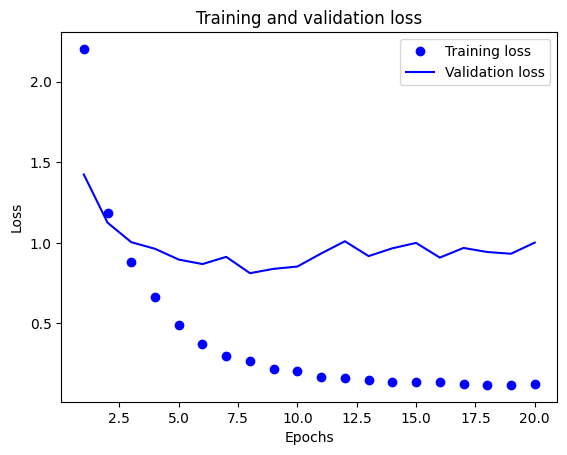

In [46]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Dibujar la precisión en entrenamiento y validación**



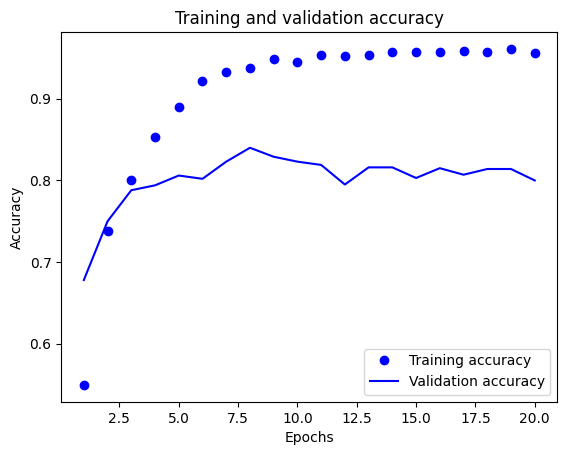

In [47]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()



```
# Tiene formato de código

```
# Tiene formato de código
```


```

❓❓❓
**EJERCICIO:** **Reentrenemos desde cero con nuestras conclusiones**
❓❓❓

# Respuesta ✅

In [48]:
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical

# cargar conjunto de datos de Reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# vectorizar secuencias
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# etiquetas de codificación one-hot
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

# definir y compilar el modelo
model = keras.Sequential([
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.25),
    layers.Dense(128, activation="relu"),
    layers.Dense(46, activation="softmax")
])

# add early stopping
early_stop = EarlyStopping(monitor="val_loss", patience=3)

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# entrenar modelo
history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_split=0.2,
                    callbacks=[early_stop])

# evaluar en datos de prueba
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy: {:.2f}%".format(test_acc*100))

Epoch 1/20
15/15 [==============================] - 2s 99ms/step - loss: 2.2175 - accuracy: 0.5090 - val_loss: 1.5113 - val_accuracy: 0.6322
Epoch 2/20
15/15 [==============================] - 2s 104ms/step - loss: 1.2681 - accuracy: 0.7122 - val_loss: 1.2142 - val_accuracy: 0.7234
Epoch 3/20
15/15 [==============================] - 2s 128ms/step - loss: 0.9599 - accuracy: 0.7873 - val_loss: 1.2244 - val_accuracy: 0.6956
Epoch 4/20
15/15 [==============================] - 1s 88ms/step - loss: 0.7647 - accuracy: 0.8259 - val_loss: 1.0099 - val_accuracy: 0.7741
Epoch 5/20
15/15 [==============================] - 1s 87ms/step - loss: 0.6149 - accuracy: 0.8608 - val_loss: 1.0086 - val_accuracy: 0.7791
Epoch 6/20
15/15 [==============================] - 1s 89ms/step - loss: 0.4781 - accuracy: 0.8981 - val_loss: 1.0548 - val_accuracy: 0.7769
Epoch 7/20
15/15 [==============================] - 1s 89ms/step - loss: 0.3877 - accuracy: 0.9164 - val_loss: 0.9194 - val_accuracy: 0.8069
Epoch 8/20


❓❓❓

¿Cómo interpretamos estos resultados?¿Son buenos o malos?

❓❓❓



# Respuesta ✅

Los resultados del entrenamiento indican que el modelo está mejorando a lo largo de las épocas, ya que tanto la precisión del entrenamiento como la de la validación están aumentando, mientras que la pérdida del entrenamiento y la validación están disminuyendo. Esto sugiere que el modelo está aprendiendo a generalizar a nuevos datos, ya que se está desempeñando bien tanto en los conjuntos de entrenamiento como en los de validación.

La precisión de la prueba del 79,70 % sugiere que el modelo puede clasificar correctamente el 79,70 % de las muestras del conjunto de prueba, lo que representa un rendimiento razonablemente bueno para un problema de clasificación de varias clases con 46 clases.

En general, los resultados son buenos, pero podrían mejorarse experimentando con diferentes arquitecturas, hiperparámetros o técnicas de optimización.

In [49]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.18432769367764915

### Generar predicciones/salidas sobre datos nuevos

In [50]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 5ms/step


In [51]:
predictions[0].shape

(46,)

In [52]:
np.sum(predictions[0])

1.0

In [53]:
np.argmax(predictions[0])

3

### Otra forma de codificar las etiquetas y la pérdida

Como tensor entero: 

In [54]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

Esta variante necesita una función de pérdida diferente:

In [55]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### La importancia de tener capas intermedias suficientemente grandes

grandes ➡ anchas

Antes hemos mencionado que, como la capa de salida tiene 46 dimensiones, hay que evitar las capas intermedias con muchas menos de 46 unidades. Veamos qué sucede cuando introducimos un “cuello de botella” de información al tener capas intermedias que son significativamente menos de 46 dimensiones: por ejemplo, de 4 dimensiones.

**Ejemplo de modelo con un cuello de botella**

In [56]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 14ms/step - loss: 2.5649 - accuracy: 0.4168 - val_loss: 1.8106 - val_accuracy: 0.5910
Epoch 2/20
63/63 [==============================] - 1s 11ms/step - loss: 1.5706 - accuracy: 0.6206 - val_loss: 1.4633 - val_accuracy: 0.6490
Epoch 3/20
63/63 [==============================] - 1s 11ms/step - loss: 1.3121 - accuracy: 0.6848 - val_loss: 1.3765 - val_accuracy: 0.6700
Epoch 4/20
63/63 [==============================] - 1s 15ms/step - loss: 1.1718 - accuracy: 0.7162 - val_loss: 1.3027 - val_accuracy: 0.6920
Epoch 5/20
63/63 [==============================] - 1s 18ms/step - loss: 1.0693 - accuracy: 0.7395 - val_loss: 1.2785 - val_accuracy: 0.7030
Epoch 6/20
63/63 [==============================] - 1s 13ms/step - loss: 0.9894 - accuracy: 0.7507 - val_loss: 1.2857 - val_accuracy: 0.6910
Epoch 7/20
63/63 [==============================] - 1s 11ms/step - loss: 0.9211 - accuracy: 0.7588 - val_loss: 1.2851 - val_accuracy: 0.6980
Epoch 8/20
63

### Experimentos adicionales

Utilizando lo que hemos visto y tú intuición, prueba lo siguiente: 
* Visualiza métricas de train y validación.
* Prueba capas ocultas de diferente tamaño: 32, 128, etc. 
* Prueba diferente número de capas intermedias. 

¿Cuáles son los parámetros óptimos de tu modelo?

### Resumen

* ¿Cuántas neuronas de salida tienen los modelos anteriores? 
* ¿Cuándo utilizamos la función softmax y cuándo la sigmoide?
* ¿Qué opciones tenemos para representar las etiquetas en un problema multiclase?
* ¿Qué principios podemos seguir para diseñar la arquitectura de la red?

## Predicting house prices: A regression example

### The Boston Housing Price dataset

**Loading the Boston housing dataset**

In [57]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [58]:
train_data.shape

(404, 13)

In [59]:
test_data.shape

(102, 13)

In [60]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### Preparing the data

**Normalizing the data**

In [61]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### Building your model

**Model definition**

In [62]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### Validating your approach using K-fold validation

**K-fold validation**

In [63]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [64]:
all_scores

[1.846194863319397, 2.3232979774475098, 2.622314453125, 2.3375539779663086]

In [65]:
np.mean(all_scores)

2.282340317964554

**Saving the validation logs at each fold**

In [66]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


**Building the history of successive mean K-fold validation scores**

In [67]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

**Plotting validation scores**

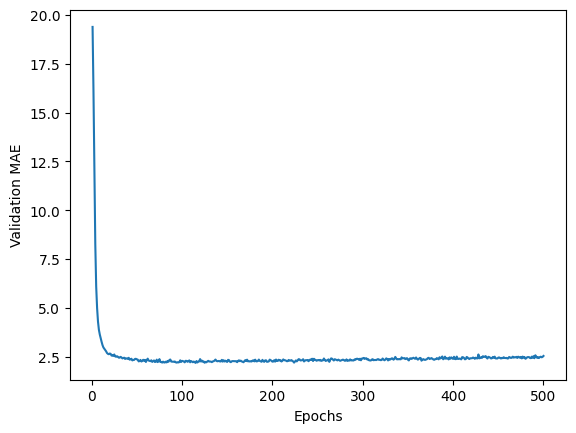

In [68]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Plotting validation scores, excluding the first 10 data points**

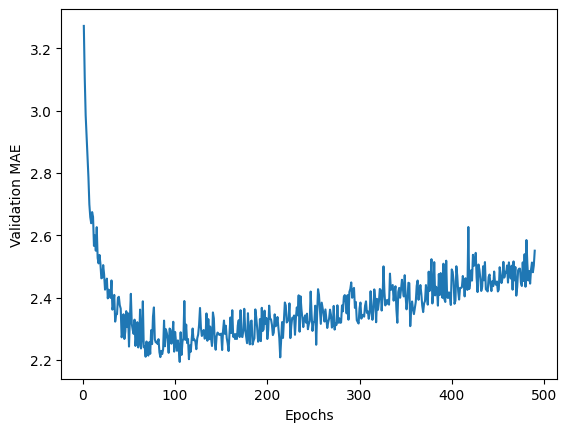

In [69]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Training the final model**

In [70]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 2ms/step - loss: 14.4952 - mae: 2.4699


In [71]:
test_mae_score

2.469876766204834

### Generating predictions on new data

In [72]:
predictions = model.predict(test_data)
predictions[0]

4/4 [==============================] - 0s 2ms/step


array([7.5213], dtype=float32)

### Wrapping up

## Summary